# Data Analyses
## Synopsis & Reviews

In this document, we investigate if there's any common trend in topics using synopsis and box_office.  
Also we will see if there's any trend in language used for highly rated reviews.  
We only use information from Rotten Tomatoes.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud

%matplotlib inline

In [147]:
df = pd.read_csv("zippedData/rt.movie_info.tsv", delimiter = '\t')

In [148]:
df.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [149]:
n = len(df[~df.box_office.isnull()])
print(f"{n} movies with box office information.")

340 movies with box office information.


We will only use the data with box_office information here  
since it's the primary dependent variable we shouldn't use a method that may bias the data. 

In [150]:
df.dropna(subset = ['box_office'], inplace = True)

In [151]:
# change number format to an integer
df.box_office = df.box_office.apply(lambda x: int(x.replace(',', '')))

I will divide the group into 3 tiers by box office number and see what are the most commonly used words to describe their synopsis in each groups.

In [153]:
n = round(len(df)/2)

df_t1 = df[0:n]
df_t2 = df[n:]
print(f"{len(df_t1)}, {len(df_t2)}")

170, 170


In [154]:
list_articles = ['the', 'a', 'to', 'of', 'in', 's', 'is', 'as', 'that', 
                'on', 'he', 'her', 'by', 'his', 'hers', 'for', 'who', 'whom', 'their', 
                'at', 'it', 'when', 'where', 'has', 'are', 'or', 'an', 'c', 'from',
                'one', 'they', 'she', 'this', 'out', 'up', 'into', 'was', 'which', 
                'will', 'have', 't', 'be', 'also', 'while', 'about', 'him', 'them', 
                'what', 'can', 'been', 'and', 'with', 'but']

In [164]:
def plot_words(column, title, w):
    words = [re.sub(r"[^a-zA-Z0-9]+", ' ', k) for k in column]
    words = list(map(lambda x: x.lower().split(), words))
    words = [y for x in words for y in x]
    words = [x for x in words if x not in list_articles]
    unique_words = set(words)
    counts = dict.fromkeys(unique_words, 0)
    for word in words:
        counts[word] += 1
    counts = {k: v for k, v in sorted(
        counts.items(), reverse = True, key=lambda item: item[1])}
    X = list(counts.keys())[0:20]
    Y = list(counts.values())[0:20]

    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    sns.barplot(x=X, y=Y, palette="husl", ax=ax)
    ax.set_ylabel("counts")
    ax.set_title(title)
    ax.set_ylim([0,100])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()
    
    wc = WordCloud(background_color="white", width=1200, height=800, max_words=50)
    wc.generate_from_frequencies(counts)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    print(f'{w}: {counts[w]}')


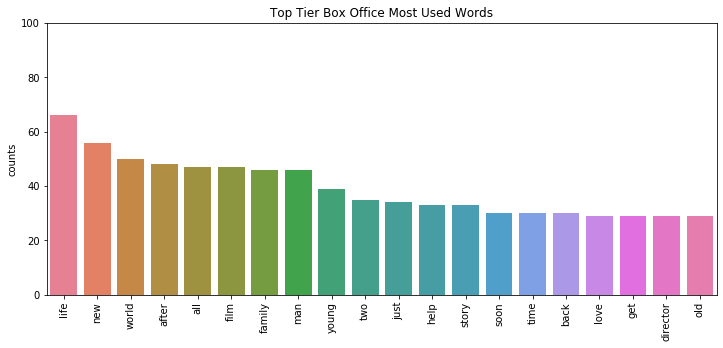

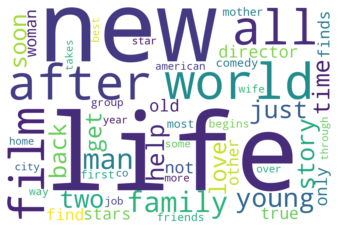

not: 28


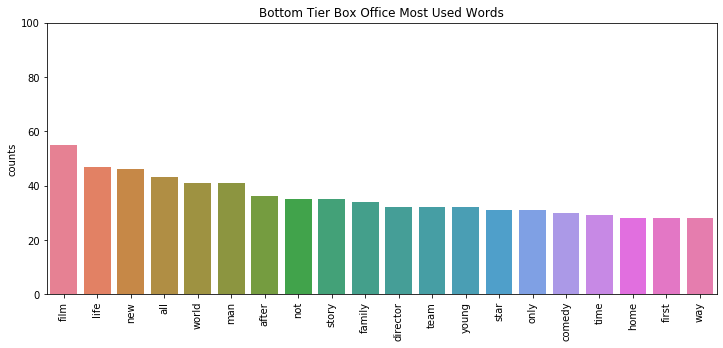

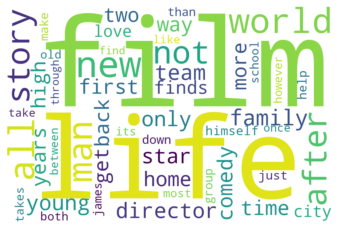

not: 35


In [165]:
plot_words(df_t1.synopsis, "Top Tier Box Office Most Used Words", 'not')
plot_words(df_t3.synopsis, "Bottom Tier Box Office Most Used Words", 'not')


In [166]:
# Average word counts may bias this results. So let's look at that
import statistics as stat
print(stat.mean(list(map(lambda x: len(x), df_t1.synopsis))))
print(stat.mean(list(map(lambda x: len(x), df_t2.synopsis))))


742.135294117647
753.3764705882353


One thing that might be interesting to look at is the use of words like 'not'

In [172]:
df2 = pd.read_csv("zippedData/rt.reviews.tsv", delimiter = '\t', 
                  encoding = "ISO-8859-1")

In [178]:
# Remove if rating is empty
df2.dropna(subset = ['rating'], axis = 0, inplace = True)

In [180]:
df2.rating.unique()

array(['3/5', 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4', '6/10',
       '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-', '5/5',
       'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
       